In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Split Data Train and Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

#Modelling
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve

In [19]:
df= pd.read_excel("D:\wine quality prediction.xlsx")

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


# Exploratory Data Analysis

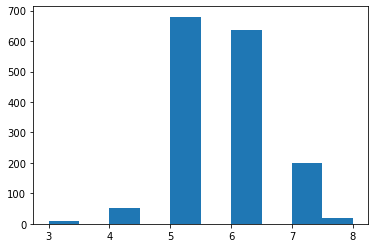

In [21]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(df['quality'],bins=10)
plt.show()

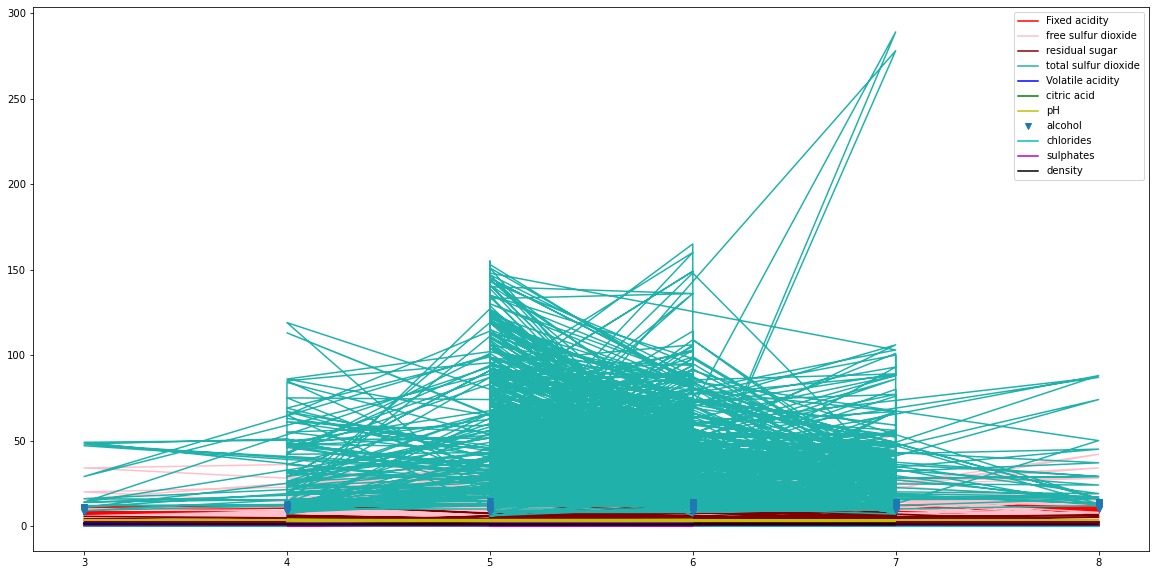

<Figure size 432x288 with 0 Axes>

In [22]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
x=df['quality']
plt.plot(x,df['fixed acidity'],'r',label='Fixed acidity')
plt.plot(x,df['free sulfur dioxide'],'pink',label='free sulfur dioxide')
plt.plot(x,df['residual sugar'],'maroon',label='residual sugar')
plt.plot(x,df['total sulfur dioxide'],'lightseagreen',label='total sulfur dioxide')
plt.plot(x,df['volatile acidity'],'b',label='Volatile acidity')
plt.plot(x,df['citric acid'],'g',label='citric acid')
plt.plot(x,df['pH'],'y',label='pH')
plt.plot(x,df['alcohol'],'v',label='alcohol')
plt.plot(x,df['chlorides'],'c',label='chlorides')
plt.plot(x,df['sulphates'],'m',label='sulphates')
plt.plot(x,df['density'],'k',label='density')
plt.legend(loc=0)
plt.figure()
plt.show()

# Data Pre-Processing

In [23]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [31]:
# Finding Null Values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [41]:
#df['total sulfur dioxide', 'pH', 'quality']=df['total sulfur dioxide', 'pH', 'quality'].fillna(0)
df['total sulfur dioxide']= df['total sulfur dioxide'].fillna(0)
df['pH']=df['pH'].fillna(0)
df['quality']=df['quality'].fillna(0)

In [43]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [44]:
Corr= df.corr()
corr_res=[]
for i in range(0,len(df.dtypes)):
    for j in range(0,len(df.dtypes)):
        value= Corr.iloc[i:i+1, j:j+1].values
        if value>0.8 and value!=1 :
            Corr_res.append[Corr.columns[i]]

In [45]:
# Standardization
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
df.iloc[:,:-1]= std.fit_transform(df.iloc[:,:-1])


In [46]:
# Splitting the Data
X= df.iloc[:,:-1].values
Y= df.iloc[:,-1].values

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

# Data Modelling

Text(0, 0.5, 'Error Rate')

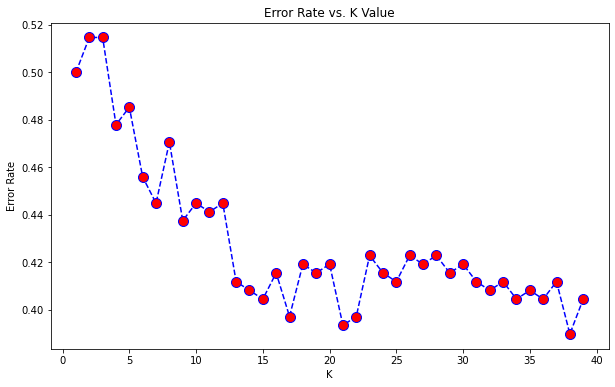

In [48]:
# K Nearest Neighbors
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue', linestyle ='dashed', marker ='o', markerfacecolor ='red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



In [49]:
# K= 21 has lowest error rate
# Model Fit
classifier2= KNeighborsClassifier(n_neighbors=21, metric='manhattan', p=2, weights='uniform')
classifier2.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=21)

In [54]:
y_pred1= classifier2.predict(x_train)
y_pred2= classifier2.predict(x_test)

In [55]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print("Accuracy score on train data set:", accuracy_score(y_train, y_pred1))
print("Accuracy score on test data set:", accuracy_score(y_test, y_pred2))

Accuracy score on train data set: 0.6167279411764706
Accuracy score on test data set: 0.5772058823529411


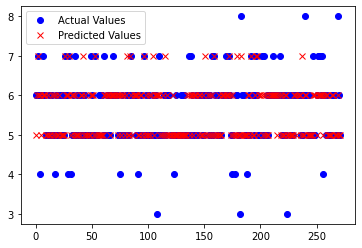

In [56]:
# Visualisation
plt.figure()
plt.plot(y_test, 'o', color='blue', label='Actual Values')
plt.plot(y_pred2, 'x', color='red', label='Predicted Values')
plt.legend()

In [57]:
df['quality'].value_counts()

5.0    577
6.0    535
7.0    167
4.0     53
8.0     17
3.0     10
0.0      1
Name: quality, dtype: int64

In [58]:
# If quality is greater than 6 then it will be in class 1 and if t is less than 6 then it will be in class 0
df['quality']=np.where(df['quality']>6, 1, 0)
df['quality'].value_counts()

0    1176
1     184
Name: quality, dtype: int64

In [59]:
# Assigning dataframe to list of array values
x=df.drop(['quality'], axis=1).values
y=df['quality'].values

In [60]:
# Splitting the data in the proportion of 70:30 and 86:14
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify= y, test_size=0.3, random_state=1111)


In [61]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0
#Fitting the model
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.8774509803921569 Best K-Score 37
